In [171]:
import pandas as pd
import numpy as np

data = pd.read_csv('../ChurnPrediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [172]:
data.drop(['customer_id'],axis=1,inplace=True)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [174]:
data.select_dtypes(include=['object']).columns

Index(['country', 'gender'], dtype='object')

<Axes: xlabel='tenure', ylabel='count'>

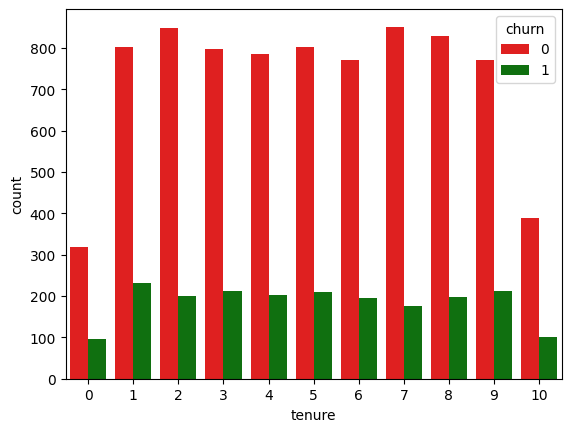

In [175]:
import seaborn as sns
sns.countplot(data=data, x='tenure',hue='churn',palette=['red','green'])

<Axes: xlabel='country', ylabel='count'>

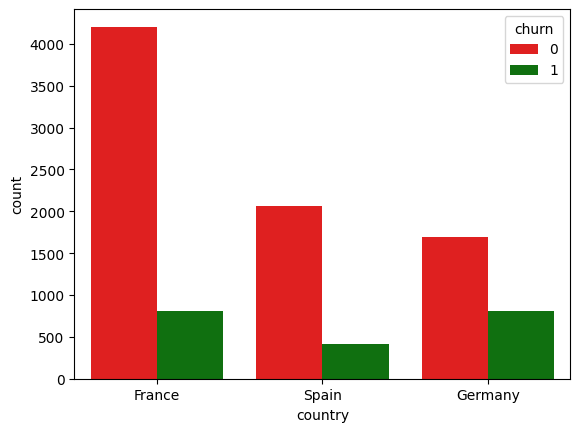

In [176]:
sns.countplot(data=data,x='country',hue='churn',palette=['red','green'])

<Axes: xlabel='gender', ylabel='count'>

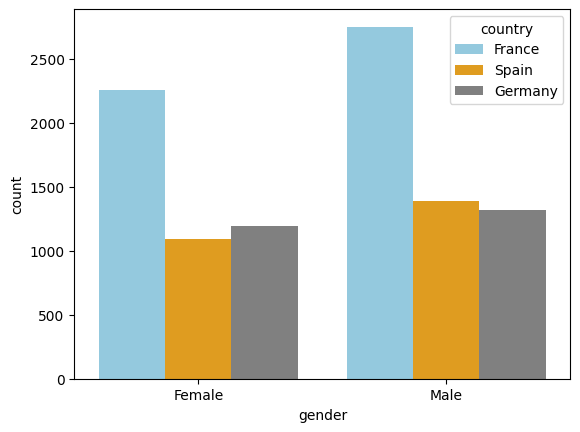

In [177]:
sns.countplot(data=data,x='gender',hue='country',palette=['skyblue','orange','grey'])

In [178]:
def get_unique_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f'{col} : {df[col].unique()}')
get_unique_values(data)

data['gender']=data['gender'].replace({'Female': 0, 'Male': 1})
data['country']=data['country'].replace({'France': 0.0, 'Spain': 0.5, 'Germany': 1.0})
data.head()

country : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']


C:\Users\Rogul\AppData\Local\Temp\ipykernel_12420\986898805.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender']=data['gender'].replace({'Female': 0, 'Male': 1})
C:\Users\Rogul\AppData\Local\Temp\ipykernel_12420\986898805.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['country']=data['country'].replace({'France': 0.0, 'Spain': 0.5, 'Germany': 1.0})


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0.0,0,42,2,0.00,1,1,1,101348.88,1
1,608,0.5,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0,39,1,0.00,2,0,0,93826.63,0
4,850,0.5,0,43,2,125510.82,1,1,1,79084.10,0


In [179]:
def scale_data(df: pd.DataFrame, cols: list=[]):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    for col in cols:
        df[col] = scaler.fit_transform(df[[col]])
    return df

data = scale_data(data, ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary'])
data.head()
    

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,0.0,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,0.5,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0.0,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0.0,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,0.5,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [180]:
from sklearn.model_selection import train_test_split

x = data.drop('churn', axis=1)
y = data['churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [181]:
from tensorflow import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(8, input_shape=(10,),activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=100)

Epoch 1/100


C:\Users\Rogul\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.5520
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4948
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4785
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4681
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4614  
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4542
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4467
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4393  
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7997 - loss: 0.4309  
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8155 - loss: 0.4246
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8165 - loss: 0.4179
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [182]:
y_pred=model.predict(x_test)
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8495 - loss: 0.3663  


[0.36630746722221375, 0.8495000004768372]

In [183]:
def format_pred_and_test(test:pd.Series,pred):
    pred = (pred > 0.5).astype(int)
    pred = pd.Series(pred.flatten())
    test.name = 'churn'
    pred.name = 'churn_predicted'
    return (test,pred)

y_test,y_pred = format_pred_and_test(y_test,y_pred)
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: churn, Length: 2000, dtype: int64

In [184]:
y_pred

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: churn_predicted, Length: 2000, dtype: int64

In [185]:
def get_model_report(test,pred):
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn','Churn'],
                yticklabels=['No Churn','Churn'])

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    print(classification_report(y_test,y_pred))
    return

Creating neural network with dropout layers

In [190]:
model_dropout = keras.Sequential(
    [
        layers.Dense(8, input_shape=(10,),activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(4, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ]
)

model_dropout.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

model_dropout.fit(x_train,y_train,epochs=100)

Epoch 1/100


C:\Users\Rogul\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7847 - loss: 0.5652
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.5149
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4974
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4921
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4848
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4778
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4789
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7987 - loss: 0.4714
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.4649
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8039 - loss: 0.4605
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4541
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [191]:
model_dropout.evaluate(x_test,y_test)
y_pred_dropout = model_dropout.predict(x_test)
y_test,y_pred_dropout = format_pred_and_test(y_test,y_pred_dropout)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.3721 
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Model Report without dropout layer

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.44      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



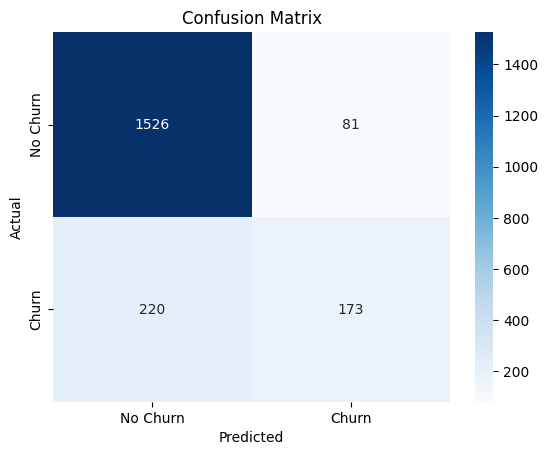

In [192]:
get_model_report(y_test,y_pred)

Model Report with dropout layer

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.44      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



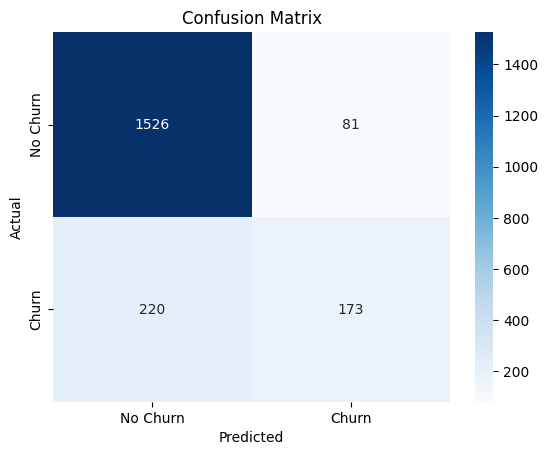

In [193]:
get_model_report(y_test,y_pred_dropout)